<a href="https://colab.research.google.com/github/cipher499/statistics_demos/blob/main/stats_pdf_cdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

In [ ]:
# draw a sample of 1000 data points from a normal distribution
sample = normal(loc=50, scale=5, size=1000)                # loc(mean) and scale(std) are population parameters

(array([ 10.,  22.,  75., 139., 205., 244., 202.,  73.,  23.,   7.]),
 array([34.42440748, 37.49990921, 40.57541094, 43.65091267, 46.7264144 ,
        49.80191613, 52.87741785, 55.95291958, 59.02842131, 62.10392304,
        65.17942477]),
 <BarContainer object of 10 artists>)

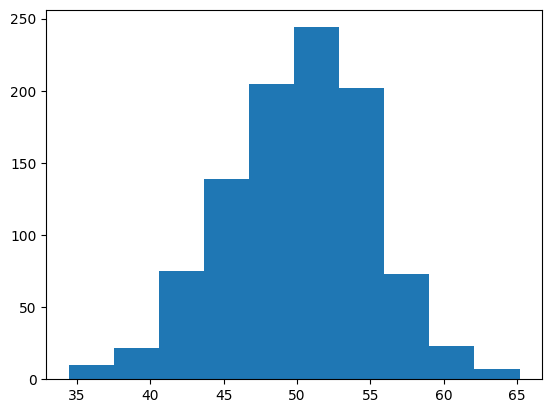

In [ ]:
# plot histogram to understand the distribution of data
plt.hist(sample, bins=10)

In [ ]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()
sample_mean, sample_std

(50.10654695575709, 5.012641260998786)

In [ ]:
# fit the distribution with the above parameters
from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [ ]:
values = np.linspace(sample.min(), sample.max(), 100)

In [ ]:
probability_density = [dist.pdf(value) for value in values]

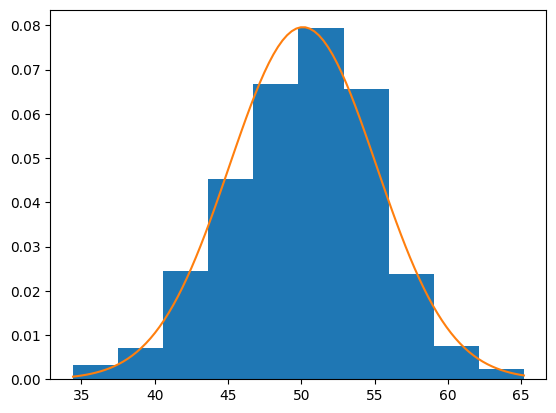

In [ ]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, probability_density)

<ipython-input-20-4c4768e4b3d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

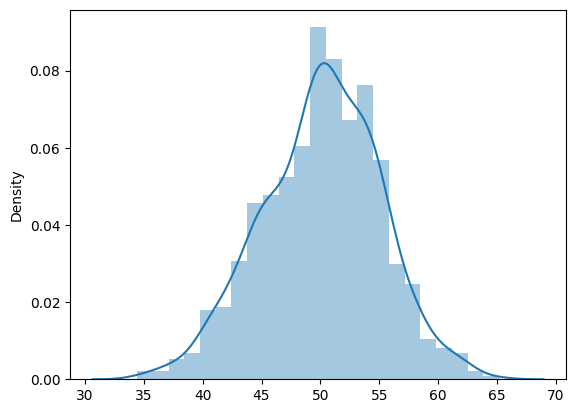

In [ ]:
import seaborn as sns

sns.distplot(sample)

# Kernel Density Estimation (KDE)

In [ ]:
# create a bimodal distribution
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

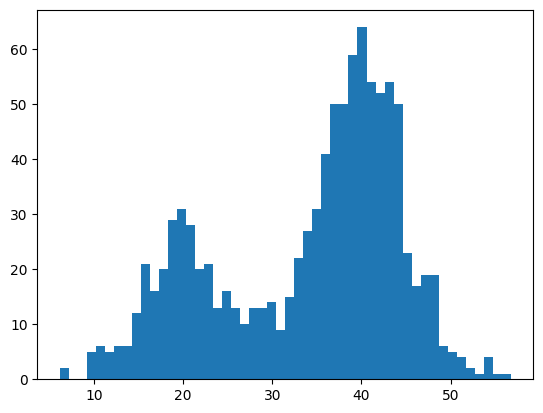

In [ ]:
# plot the distribution
plt.hist(sample, bins=50)
plt.show()

In [ ]:
from sklearn.neighbors import KernelDensity

# create the KDE model by specifying the kernel and the bandwidth
model = KernelDensity(bandwidth=3, kernel='gaussian')

# reshape the data as the model expects 2-D input
sample = sample.reshape((len(sample), 1))
# fit the model to the data
model.fit(sample)

KernelDensity(bandwidth=3)

In [ ]:
# generate a dataset of 100 points within the range of sample
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape(len(values), 1)

In [ ]:
# calculate the pds of the new data
probability_densities = model.score_samples(values)
probability_densities = np.exp(probability_densities)

score_samples returns the log-density estimate of the input sample values

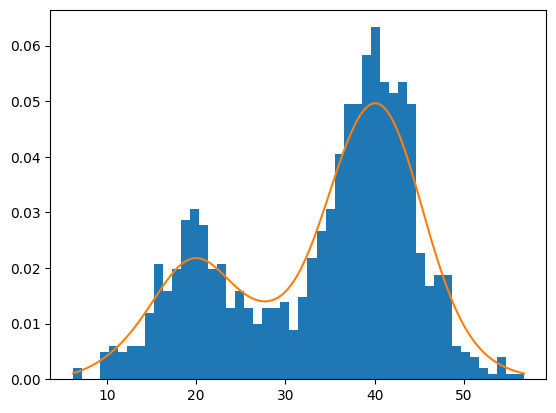

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probability_densities)
plt.show()

experiment with the bandwidth value to get the best fit

<Axes: ylabel='Density'>

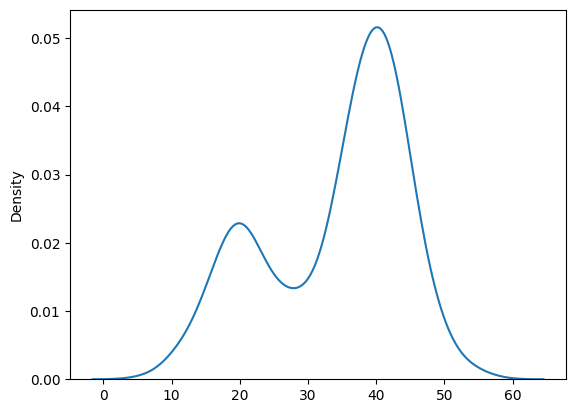

In [ ]:
import seaborn as sns

sns.kdeplot(sample.reshape(len(sample)), bw_adjust=1)